<a href="https://www.kaggle.com/code/ioannisf/heart-disease-data-anlaysis-classifications?scriptVersionId=90457423" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/heart-disease-uci/heart.csv


**DATA:** *Cleveland Heart Disease dataset from the UCI Repository.*

**DATA CONTENT**

1. **age**
2. **sex:**
   *1 = male*, *0 = female*
3.**chest pain type:** *(4 values),0 = typical angina, 1 = atypical angina, 2 = non — anginal pain, 3 = asymptotic*
4. **resting blood pressure**
5. **serum cholesterol in mg/dl**
6. **fasting blood sugar > 120 mg/dl:** *compares the fasting blood sugar value of an individual with 120mg/dl. If fasting blood sugar > 120mg/dl then : 1 (true) else : 0 (false)*
7. **restecg** = resting electrocardiographic results: (values 0,1,2),*0 = normal, 1 = having ST-T wave abnormality, 2 = left ventricular hyperthrophy*
8. **thalach** = maximum heart rate achieved
9. **exang** = exercise induced angina: *1 = yes, 0 = no*
10. **oldpeak** = ST depression induced by exercise relative to rest
11. **the slope of the peak exercise ST segment:** *0 = upsloping, 1 = flat, 2 = downsloping*
12. **number of major vessels**(0-4) colored by flourosopy
13. **thal:** *displays the thalassemia, 1 = normal, 2 = fixed defect, 3 = reversable defect*

In [2]:
import numpy as np 
import pandas as pd
import sklearn
from matplotlib import pyplot as plt
import seaborn as sb
from scipy import stats
from pylab import rcParams

In [3]:
rcParams['figure.figsize'] = 8, 6
sb.set_style('whitegrid')

In [4]:
df = pd.read_csv('/kaggle/input/heart-disease-uci/heart.csv')

In [5]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


**DATA EXPLORATION**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


**DATA CLEANING**

From the above results i picked up only those who can have outliers so as to visualize them in boxplots and see more clear the outliers.

The way i choosed them was to check the mean, the std, the min max, and some of the quantiles.

<AxesSubplot:>

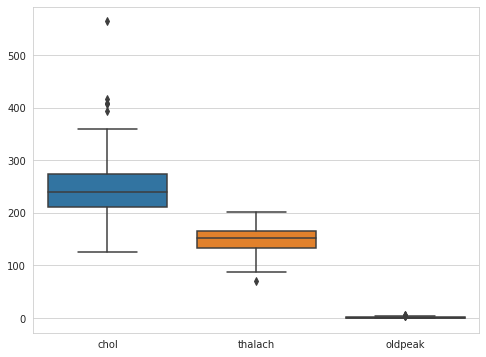

In [10]:
sb.boxplot(data=df[['chol', 'thalach', 'oldpeak']])

I will papply the z score method to delete the outiers, since the most of them are unnatural values.

In [11]:
z_scores = stats.zscore(df)

abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df_new = df[filtered_entries]
df_new.shape

(287, 14)

<AxesSubplot:>

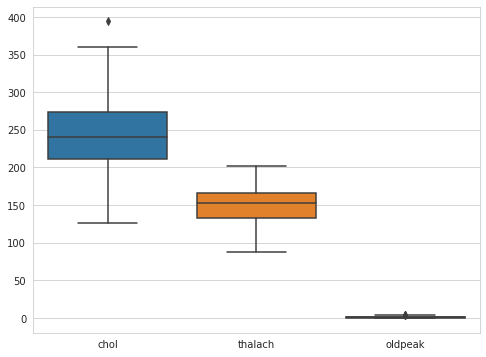

In [12]:
sb.boxplot(data=df_new[['chol', 'thalach', 'oldpeak']])

In [13]:
df_new.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000
mean,54.334495,0.689895,0.972125,131.024390,244.501742,0.142857,0.533101,149.804878,0.327526,1.004878,1.411150,0.658537,2.313589,0.550523
std,9.093125,0.463344,1.037373,16.991856,45.920719,0.350538,0.527017,22.550570,0.470131,1.080684,0.607311,0.924675,0.584703,0.498310
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,88.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.000000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,180.000000,394.000000,1.000000,2.000000,202.000000,1.000000,4.400000,2.000000,3.000000,3.000000,1.000000


Now, our data are in much way better condition. All the illogical values disapeard.
The new dataframe shape is 287 from 303 which means that we have deleted 18 data points.

**DATA ANALYSIS**

Its is important to check if our data follows the normal distribution. So, i will apply the code below in the continious feautures to check that out. 

In [14]:
from scipy.stats import shapiro

# normality test
def normality_test(lista):
    for i in lista:
        stat, p = shapiro(df_new[i])
        print('Statistics=%.3f, p=%.3f' % (stat, p))
        alpha = 0.05
        if p > alpha:
            print(i + ' Sample looks Gaussian (fail to reject H0)\n')
        else:
            print(i + ' Sample does not look Gaussian (reject H0)\n')

In [15]:
normality_test(['age', 'trestbps', 'chol', 'thalach', 'oldpeak'])

Statistics=0.987, p=0.011
age Sample does not look Gaussian (reject H0)

Statistics=0.973, p=0.000
trestbps Sample does not look Gaussian (reject H0)

Statistics=0.994, p=0.259
chol Sample looks Gaussian (fail to reject H0)

Statistics=0.976, p=0.000
thalach Sample does not look Gaussian (reject H0)

Statistics=0.858, p=0.000
oldpeak Sample does not look Gaussian (reject H0)



from the above we can understand that our data does not follow the normall distribution except for the serum cholesterol feauture.

Lets check some important percentages.

In [16]:
countNoDisease = len(df[df.target == 0])
countHaveDisease = len(df[df.target == 1])
print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((countNoDisease / (len(df.target))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((countHaveDisease / (len(df.target))*100)))

Percentage of Patients Haven't Heart Disease: 45.54%
Percentage of Patients Have Heart Disease: 54.46%


In [17]:
countFemale = len(df[df.sex == 0])
countMale = len(df[df.sex == 1])
print("Percentage of Female Patients: {:.2f}%".format((countFemale / (len(df.sex))*100)))
print("Percentage of Male Patients: {:.2f}%".format((countMale / (len(df.sex))*100)))

Percentage of Female Patients: 31.68%
Percentage of Male Patients: 68.32%


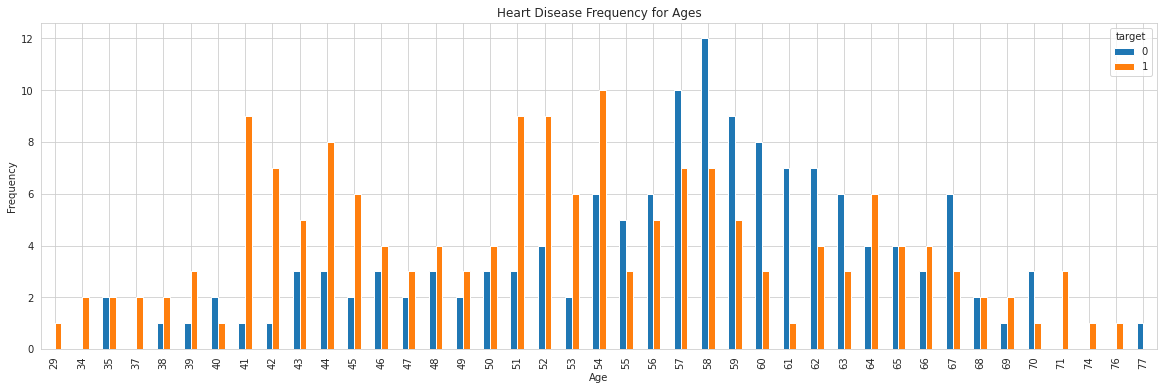

In [18]:
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

The above plot,tell us that is more usual of having heart diseases in ages 54, 52, 51, 41, 44 and 42. Moreover, ages over 57 seems to have fewer heart diseases.

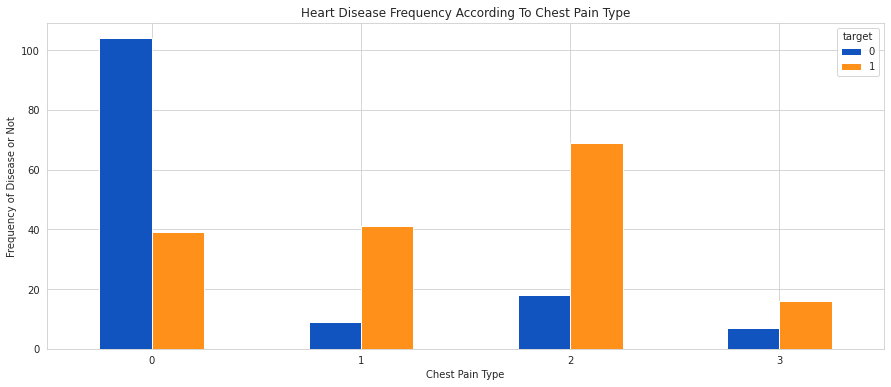

In [19]:
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(15,6),color=['#1154BF','#FF9019' ])
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

The barplots showing us that the chest pain types 1, 2 and 3 (1 = atypical angina, 2 = non — anginal pain, 3 = asymptotic), frequantly causes heart diseases.

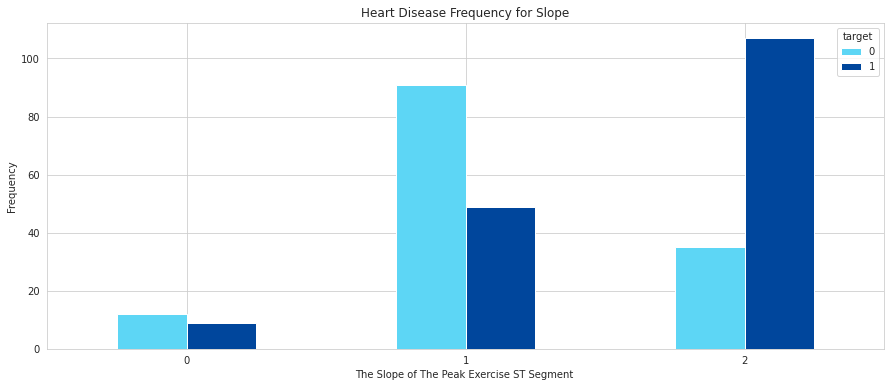

In [20]:
pd.crosstab(df.slope,df.target).plot(kind="bar",figsize=(15,6),color=['#5DD6F5','#00469C' ])
plt.title('Heart Disease Frequency for Slope')
plt.xlabel('The Slope of The Peak Exercise ST Segment ')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

The persons with downsloping(type 2) tends to have heart diseases in contrast with the others who have 0 or 1 type of slopes.

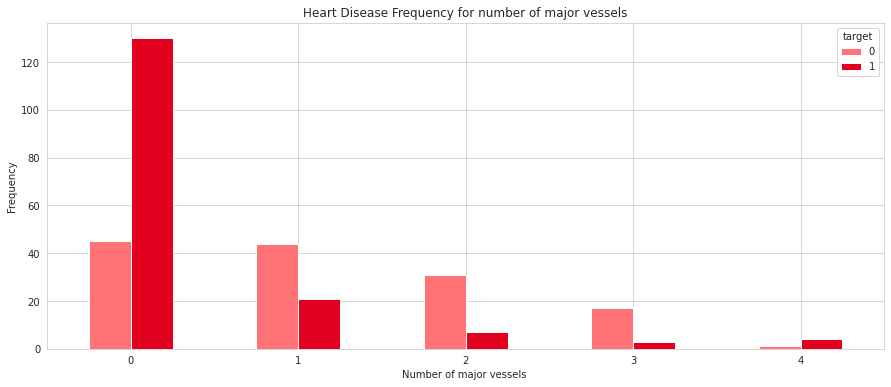

In [21]:
pd.crosstab(df.ca,df.target).plot(kind="bar",figsize=(15,6),color=['#FF7377','#E3001E' ])
plt.title('Heart Disease Frequency for number of major vessels')
plt.xlabel('Number of major vessels ')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

The individuals with 0 and 4 types number of vessels tends to have heart disease.

Check correlation with spearmans method, since they do not follow the normal distribution. 

<AxesSubplot:>

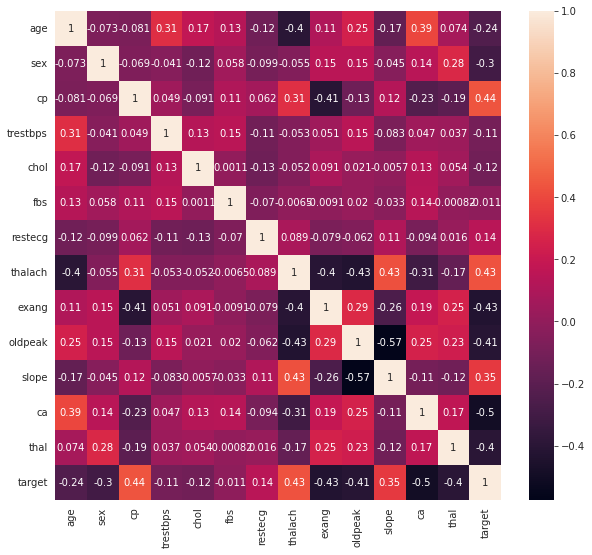

In [22]:
rcParams['figure.figsize'] = 10, 9
corr_matrix = df_new.corr(method='spearman')
sb.heatmap(corr_matrix,annot = True)

The above correlation plot gives us the correlations between feautures. Τhe darker and the brighter rectangles have the greatest correlations (-0.3 - -1.0 for darker and 0.3 - 1.0 for brighter).

Lets see some of the semantic correlations in scatterplots.

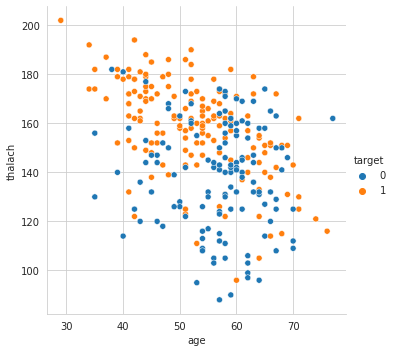

In [23]:
sb.relplot(x="age", y="thalach", hue="target", data = df_new)

The older a person is the lower the maximum heart rate is, which means less possible to have heart disease.

**Data Analysis Conclusion**

In conclusion, these data tells us that the heart diesease is more likely to occure in individuals who are suffering from chest pain or having high heart rates or other problems like slope of type 2 and number of major vessels (0 or 4). Moreover, the plots show that the risk of hurt disease is dicreasing with the increasing of the age. Generally it is statistical approved that the risk of heart disease is increasing with the age, which is in controversy with these data's results. In my opinion, these data are not well structured, maybe the data's sampling is biased and thats the reason to have such results.

**Creating Dummy Variables**

Since 'cp', 'thal' and 'slope' are categorical variables we'll turn them into dummy variables.

In [24]:
a = pd.get_dummies(df_new['cp'], prefix = "cp")
b = pd.get_dummies(df_new['thal'], prefix = "thal")
c = pd.get_dummies(df_new['slope'], prefix = "slope")

In [25]:
frames = [df_new, a, b, c]
df_new = pd.concat(frames, axis = 1)
df_new.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,cp_0,cp_1,cp_2,cp_3,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,3,145,233,1,0,150,0,2.3,...,0,0,0,1,1,0,0,1,0,0
1,37,1,2,130,250,0,1,187,0,3.5,...,0,0,1,0,0,1,0,1,0,0
2,41,0,1,130,204,0,0,172,0,1.4,...,0,1,0,0,0,1,0,0,0,1
3,56,1,1,120,236,0,1,178,0,0.8,...,0,1,0,0,0,1,0,0,0,1
4,57,0,0,120,354,0,1,163,1,0.6,...,1,0,0,0,0,1,0,0,0,1


In [26]:
df_new = df_new.drop(columns = ['cp', 'thal', 'slope'])
df_new.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_0,cp_1,cp_2,cp_3,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,145,233,1,0,150,0,2.3,0,...,0,0,0,1,1,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,...,0,0,1,0,0,1,0,1,0,0
2,41,0,130,204,0,0,172,0,1.4,0,...,0,1,0,0,0,1,0,0,0,1
3,56,1,120,236,0,1,178,0,0.8,0,...,0,1,0,0,0,1,0,0,0,1
4,57,0,120,354,0,1,163,1,0.6,0,...,1,0,0,0,0,1,0,0,0,1


**SEPERATE INTO X AND y**

In [27]:
X = df_new.drop(columns='target') # Features
y = df_new['target'] # Lables

**NORMALIZATION**

In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) 

**SPLIT DATA**

In [29]:
from sklearn.model_selection import train_test_split

#train test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled,  y, test_size= 0.20,random_state=0)

**LOGISTIC REGRESSION**

In [30]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0, n_jobs=-1).fit(X_train, y_train)      

accuracy = clf.score(X_test, y_test)
print("Test Accuracy: {:.2f}%".format(accuracy*100.0))

Test Accuracy: 86.21%


**K-Nearest Neighbour (KNN) Classification**

![](https://miro.medium.com/max/405/0*rc5_e6-6AHzqppcr)

In [31]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3, n_jobs=-1).fit(X_train, y_train)  # n_neighbors means k

accuracy = knn.score(X_test, y_test)
print("Test Accuracy: {:.2f}%".format(accuracy*100.0))

Test Accuracy: 82.76%


With KNN 3_neighbors we have test accuracy: 82.76. We should make a function to check which k can give us the maximum accuracy. 

In [32]:
def best_k():
    score_list = []
    for k in range(1, 15):
        knn = KNeighborsClassifier(n_neighbors = k, n_jobs=-1).fit(X_train, y_train)
        score = knn.score(X_test, y_test)
        score_list.append({"k_neighbor":k, "Score": score})
        score_list = sorted(score_list,reverse=True, key=lambda d: d['Score']) 
    return score_list[:5]  

best_k()

[{'k_neighbor': 7, 'Score': 0.8793103448275862},
 {'k_neighbor': 8, 'Score': 0.8793103448275862},
 {'k_neighbor': 9, 'Score': 0.8793103448275862},
 {'k_neighbor': 10, 'Score': 0.8793103448275862},
 {'k_neighbor': 12, 'Score': 0.8620689655172413}]

From the above result for k = 7 we can achive Test accuracy: 87.93%

In [33]:
knn_7 = KNeighborsClassifier(n_neighbors = 7, n_jobs=-1).fit(X_train, y_train)  # n_neighbors means k

accuracy = knn_7.score(X_test, y_test)
print("Test Accuracy: {:.2f}%".format(accuracy*100.0))

Test Accuracy: 87.93%


**RANDOM FOREST CLASSIFICATION**

![](https://upload.wikimedia.org/wikipedia/commons/7/76/Random_forest_diagram_complete.png)

In [34]:
from sklearn.ensemble import RandomForestClassifier

Rf = RandomForestClassifier(n_estimators = 90, random_state = 1, n_jobs=-1).fit(X_train, y_train)

accuracy = Rf.score(X_test, y_test)
print("Test Accuracy: {:.2f}%".format(accuracy*100.0))

Test Accuracy: 86.21%


**NAIVE BAYES CLASSIFIER**

![](https://www.pico.net/assets/kb/25-what-are-naive-bayes-classifiers/naive-bayes-theorem.png)

In [35]:
from sklearn.naive_bayes import GaussianNB

Nb = GaussianNB().fit(X_train, y_train)

accuracy = Nb.score(X_test, y_test)
print("Test Accuracy: {:.2f}%".format(accuracy*100.0))

Test Accuracy: 87.93%


**SVM CLASSIFIER**

![](https://upload.wikimedia.org/wikipedia/commons/thumb/7/72/SVM_margin.png/300px-SVM_margin.png)

In [36]:
from sklearn.svm import SVC

svm = SVC(C=1, kernel='rbf', degree=3, gamma='scale').fit(X_train, y_train)

accuracy = svm.score(X_test, y_test)
print("Test Accuracy: {:.2f}%".format(accuracy*100.0))

Test Accuracy: 86.21%


We should probably check other kernels and C paremeters.

In [37]:
def kernel():
    kernels_list = ['linear', 'poly', 'rbf', 'sigmoid']
    for i in kernels_list:
        svm = SVC(C=1, kernel=i, degree=3, gamma='scale').fit(X_train, y_train)
        accuracy = svm.score(X_test, y_test)
        print('kernel: {}, Test Accuracy: {:.2f}%\n'.format(i, accuracy*100))
        
kernel()

kernel: linear, Test Accuracy: 87.93%

kernel: poly, Test Accuracy: 86.21%

kernel: rbf, Test Accuracy: 86.21%

kernel: sigmoid, Test Accuracy: 87.93%



The best results are with the linear and sigmoid kernels. I'll use the sigmoid kernel and continue processing the other variables.

In [38]:
def C():
    C_list = [0.05, 0.1, 0.5, 1, 2, 10, 20]
    for i in C_list:
        svm = SVC(C=i, kernel='sigmoid', gamma='scale').fit(X_train, y_train)
        accuracy = svm.score(X_test, y_test)
        print('C: {}, Test Accuracy: {:.2f}%\n'.format(i, accuracy*100))
        
C()

C: 0.05, Test Accuracy: 87.93%

C: 0.1, Test Accuracy: 87.93%

C: 0.5, Test Accuracy: 89.66%

C: 1, Test Accuracy: 87.93%

C: 2, Test Accuracy: 87.93%

C: 10, Test Accuracy: 82.76%

C: 20, Test Accuracy: 81.03%



Now we have reach Accuracy: 89.66% which is preaty good. As a result, i'll fix kernel=sigmoid and C=0.5

In [39]:
svm_best = SVC(C=0.5, kernel='sigmoid', gamma='scale').fit(X_train, y_train)

accuracy = svm_best.score(X_test, y_test)
print("Test Accuracy: {:.2f}%".format(accuracy*100.0))

Test Accuracy: 89.66%


**MODEL'S SCORES**


1. **Logistic Regression:** 86.21
2. **KNN:** 87.93
3. **Random Forest:** 86.21
4. **Naive Bayes:** 87.93
5. **SVM:** 89.66



**Confusion Matrix**

In [40]:
# Predicted values
y_pred_clf = clf.predict(X_test)
y_pred_knn_7 = knn_7.predict(X_test)
y_pred_svm_best = svm_best.predict(X_test)
y_pred_Nb = Nb.predict(X_test)
y_pred_Rf = Rf.predict(X_test)

In [41]:
from sklearn.metrics import confusion_matrix

cm_clf = confusion_matrix(y_test,y_pred_clf)
cm_knn_7 = confusion_matrix(y_test,y_pred_knn_7)
cm_svm_best = confusion_matrix(y_test,y_pred_svm_best)
cm_Nb = confusion_matrix(y_test,y_pred_Nb)
cm_Rf = confusion_matrix(y_test,y_pred_Rf)

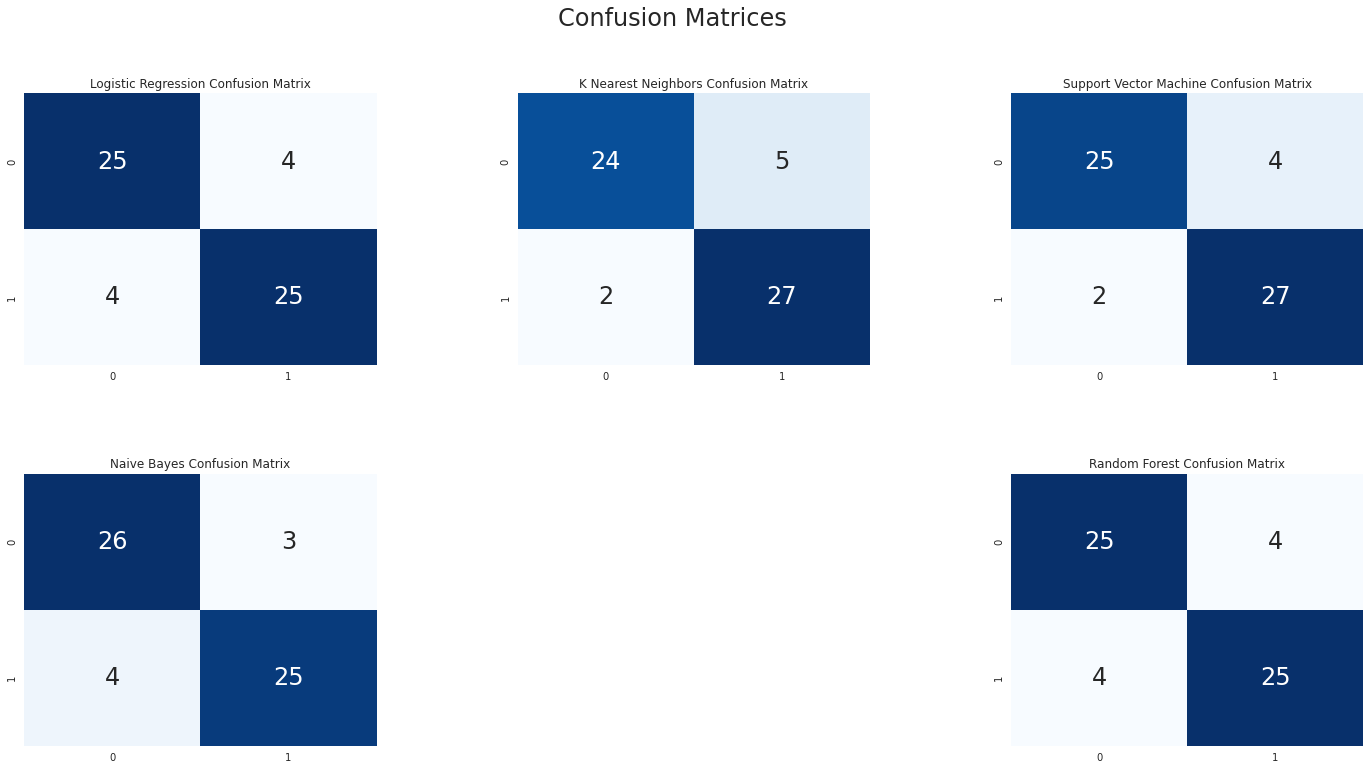

In [42]:
plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrices",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix")
sb.heatmap(cm_clf,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,2)
plt.title("K Nearest Neighbors Confusion Matrix")
sb.heatmap(cm_knn_7,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,3)
plt.title("Support Vector Machine Confusion Matrix")
sb.heatmap(cm_svm_best,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,4)
plt.title("Naive Bayes Confusion Matrix")
sb.heatmap(cm_Nb,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,6)
plt.title("Random Forest Confusion Matrix")
sb.heatmap(cm_Rf,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.show()


From the above matrices SVM still remains the best choice, since the FN and TN which are very important for a machine to predict them right in healthcare ocassions, are the best between the other matrices.

In [43]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def model_score(y_pred_list):
    for i in y_pred_list:
        print("Accuracy score is: {:.2f}%".format(accuracy_score(y_test, i)*100)) 
        print("Precision score is: {:.2f}%".format(precision_score(y_test, i)*100)) 
        print("Recall score is: {:.2f}%".format(recall_score(y_test, i)*100)) 
        print("F1 score is: {:.2f}%\n".format(f1_score(y_test, i)*100))

In [44]:
y_pred_list = [y_pred_clf
              ,y_pred_knn_7 
              ,y_pred_svm_best 
              ,y_pred_Nb 
              ,y_pred_Rf]
model_score(y_pred_list)

Accuracy score is: 86.21%
Precision score is: 86.21%
Recall score is: 86.21%
F1 score is: 86.21%

Accuracy score is: 87.93%
Precision score is: 84.38%
Recall score is: 93.10%
F1 score is: 88.52%

Accuracy score is: 89.66%
Precision score is: 87.10%
Recall score is: 93.10%
F1 score is: 90.00%

Accuracy score is: 87.93%
Precision score is: 89.29%
Recall score is: 86.21%
F1 score is: 87.72%

Accuracy score is: 86.21%
Precision score is: 86.21%
Recall score is: 86.21%
F1 score is: 86.21%



The scores tell us the same as the matrices. Svm model have the best F1 score 90% and recall score 93.10%

**Thank you for your time!**